# <font color='red'> Notebook 1 - Regression Models comparison 

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for this dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- We use train, test and validation datasets to get a more accurate results.

### Regression Task:
- Apply all the basic regression models. Grid Search is used to find the best scaling parameter. Plots and graphs help to get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, we try to find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.


---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [1]:
# Basic libraries requestion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
audit_risk_df = pd.read_csv("audit_risk.csv")
trial_df = pd.read_csv("trial.csv")
audit_risk_df.T
audit_risk_df['Risk'].describe()

count    776.000000
mean       0.393041
std        0.488741
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Risk, dtype: float64

In [3]:
print(audit_risk_df.columns)
print(trial_df.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


In [4]:
audit_risk_df = audit_risk_df.drop("Detection_Risk", axis = 1)

In [5]:
trial_df.T
trial_df['Risk'].unique()

array([1, 0])

In [6]:
audit_risk_df.head(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0


In [7]:
audit_risk_df["Money_Value"].head(2)

0    3.38
1    0.94
Name: Money_Value, dtype: float64

In [8]:
audit_risk_df["Score_A"] = audit_risk_df["Score_A"]*10
audit_risk_df["Score_B"] = audit_risk_df["Score_B"]*10

c_with_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score', 'Risk']
c_without_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score']
c_with_risk_cols_upper = [x.upper() for x in c_with_risk_cols]
c_without_risk_cols_upper = [x.upper() for x in c_without_risk_cols]

audit_names = audit_risk_df.columns
audit_names_upper =  [x.upper() for x in audit_names]
audit_risk_df.columns = audit_names_upper

trial_names = trial_df.columns
trial_names_upper =  [x.upper() for x in trial_names]
trial_df.columns = trial_names_upper

# c_with_risk_cols will result in an inner merge (~580 observations on dropping duplicates)
# c_without_risk_cols will result in 763 observations after dropping duplicates but with two target variables which can be reduced using a Logical OR in case 

risk_df = audit_risk_df.merge(trial_df, on=c_without_risk_cols_upper)
risk_df.shape
risk_df = risk_df.drop_duplicates()
risk_df.shape

(763, 33)

In [9]:
risk_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'RISK_x', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS',
       'LOSS_SCORE', 'HISTORY_SCORE', 'RISK_y'],
      dtype='object')

In [10]:
 ##Central Imputation

risk_df['MONEY_VALUE'] = risk_df["MONEY_VALUE"].fillna(risk_df["MONEY_VALUE"].mean())
# merged_data_sans_dup = merged_data_sans_dup["Money_Value"].fillna(merged_data_sans_dup["Money_Value"].median())

risk_df.isnull().sum()

SECTOR_SCORE     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
RISK_A           0
PARA_B           0
SCORE_B          0
RISK_B           0
TOTAL            0
NUMBERS          0
SCORE_B.1        0
RISK_C           0
MONEY_VALUE      0
SCORE_MV         0
RISK_D           0
DISTRICT_LOSS    0
PROB             0
RISK_E           0
HISTORY          0
PROB             0
RISK_F           0
SCORE            0
INHERENT_RISK    0
CONTROL_RISK     0
AUDIT_RISK       0
RISK_x           0
MARKS            0
MONEY_MARKS      0
DISTRICT         0
LOSS             0
LOSS_SCORE       0
HISTORY_SCORE    0
RISK_y           0
dtype: int64

In [11]:
# Type conversions: Location ID that holds three string values and rest in the form of numeric values is a categorical attribute
risk_df = risk_df.copy()
risk_df[['LOCATION_ID']] = risk_df[['LOCATION_ID']].astype('category')

# Check type conversions
risk_df.dtypes

SECTOR_SCORE      float64
LOCATION_ID      category
PARA_A            float64
SCORE_A           float64
RISK_A            float64
PARA_B            float64
SCORE_B           float64
RISK_B            float64
TOTAL             float64
NUMBERS           float64
SCORE_B.1         float64
RISK_C            float64
MONEY_VALUE       float64
SCORE_MV          float64
RISK_D            float64
DISTRICT_LOSS       int64
PROB              float64
RISK_E            float64
HISTORY             int64
PROB              float64
RISK_F            float64
SCORE             float64
INHERENT_RISK     float64
CONTROL_RISK      float64
AUDIT_RISK        float64
RISK_x              int64
MARKS               int64
MONEY_MARKS         int64
DISTRICT            int64
LOSS                int64
LOSS_SCORE          int64
HISTORY_SCORE       int64
RISK_y              int64
dtype: object

In [12]:
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("LOHARU", 45)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("NUH", 46)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("SAFIDON", 47)

In [13]:
risk_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,19.721311,2.491298,3.538663,1.373919,10.983474,3.150721,6.441822,13.442532,5.068807,0.224115,...,0.574574,7.284109,0.398427,2.241153,2.925295,2.508519,0.030144,2.062910,2.170380,0.635649
std,24.132399,5.718259,1.743985,3.465152,50.489113,1.705967,30.316831,51.719679,0.266546,0.080974,...,0.447253,38.985618,0.489895,0.809740,1.606557,1.230994,0.185804,0.378178,0.685288,0.481563
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.260000,2.000000,0.052000,0.000000,2.000000,0.000000,0.590000,5.000000,0.200000,...,0.400000,0.318600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.440000,2.000000,0.088000,1.420000,5.000000,0.200000,...,0.400000,0.590000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.515000,6.000000,1.509000,4.365000,4.000000,2.104000,7.990000,5.000000,0.200000,...,0.400000,3.452800,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,1264.630000,6.000000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12149ad68>,
 'caps': [<matplotlib.lines.Line2D at 0x121411438>,
 'boxes': [<matplotlib.lines.Line2D at 0x12149abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x121411ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x121411e10>],
 'means': []}

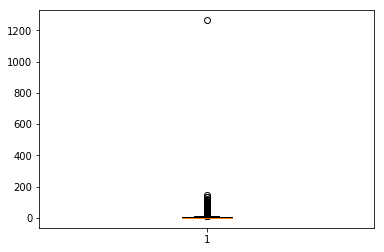

In [14]:
plt.boxplot(risk_df['PARA_B'])

In [15]:
risk_df[risk_df['PARA_B']==1264.630000]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
241,2.72,2,4.28,6.0,2.568,1264.63,6.0,758.778,1268.91,5.5,...,2.4,961.5144,1,4,6,6,0,2,6,1


In [16]:
risk_df.shape

(763, 33)

In [17]:
sans_out =risk_df[risk_df.PARA_B != 1264.630000]

{'whiskers': [<matplotlib.lines.Line2D at 0x121573c50>,
 'caps': [<matplotlib.lines.Line2D at 0x12157f320>,
 'boxes': [<matplotlib.lines.Line2D at 0x121573b00>],
 'medians': [<matplotlib.lines.Line2D at 0x12157f9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12157fcf8>],
 'means': []}

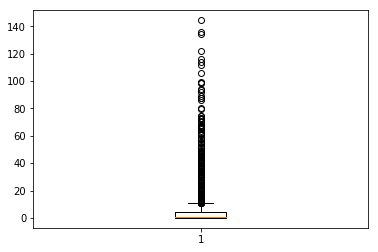

In [18]:
plt.boxplot(sans_out['PARA_B'])

In [19]:
sans_out[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,762.000000,762.000000
mean,14.320450,8.370946
std,67.127781,40.310310
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.110000,0.021000
75%,5.965000,2.309000
max,935.030000,561.018000


In [20]:
sans_out[(sans_out['INHERENT_RISK'] == 622.838000) | (sans_out['TOTAL'] == 191.360000) | (sans_out['MONEY_VALUE'] == 935.030000) |(sans_out['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
39,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.4,115.5016,1,2,6,2,0,2,2,1
344,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.4,124.5676,1,2,6,2,0,2,2,1


In [21]:
final_df = sans_out[(sans_out['INHERENT_RISK'] != 622.838000) & (sans_out['TOTAL'] != 191.360000) & (sans_out['MONEY_VALUE'] != 935.030000) & (sans_out['RISK_D'] != 561.018000)]

In [22]:
final_df

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,0.4,1.714800,1,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,0.4,0.510800,0,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,0.4,0.309600,0,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,0.4,3.506000,1,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,0.4,0.283200,0,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,0.4,0.431200,0,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,0.4,6.354800,1,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,0.4,3.606800,1,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,0.4,3.441200,1,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,0.4,0.874400,0,2,2,2,0,2,2,1


{'whiskers': [<matplotlib.lines.Line2D at 0x123740588>,
 'caps': [<matplotlib.lines.Line2D at 0x123740c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x123740438>],
 'medians': [<matplotlib.lines.Line2D at 0x123746320>],
 'fliers': [<matplotlib.lines.Line2D at 0x123746668>],
 'means': []}

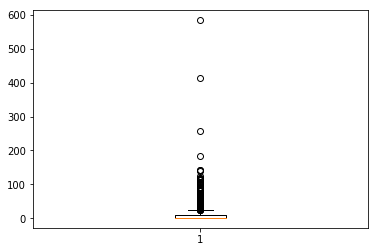

In [23]:
plt.boxplot(final_df['INHERENT_RISK'])

In [24]:
final_df.shape

(760, 33)

In [25]:
final_df['RISK'] = final_df['RISK_x'] & final_df['RISK_y']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
final_df = final_df.drop(['RISK_x','RISK_y'],axis=1)

In [27]:
final_df

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,8.57400,0.4,1.714800,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,2.55400,0.4,0.510800,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,1.54800,0.4,0.309600,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,17.53000,0.4,3.506000,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,1.41600,0.4,0.283200,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,2.15600,0.4,0.431200,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,31.77400,0.4,6.354800,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,18.03400,0.4,3.606800,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,17.20600,0.4,3.441200,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,4.37200,0.4,0.874400,2,2,2,0,2,2,0


In [28]:
final_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.787842,2.409974,3.528947,1.324648,9.163488,3.139474,5.349245,11.541094,5.068421,0.223947,...,15.393907,0.572632,5.731831,2.239474,2.913158,2.505263,0.030263,2.063158,2.165789,0.396053
std,24.156673,5.372002,1.740536,3.257894,21.567462,1.699886,12.982757,23.734227,0.266590,0.080873,...,36.681740,0.443116,17.036510,0.808727,1.598034,1.226615,0.186161,0.378904,0.672351,0.489398
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.257500,2.000000,0.051500,0.000000,2.000000,0.000000,0.587500,5.000000,0.200000,...,1.592000,0.400000,0.318400,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.435000,2.000000,0.087000,1.420000,5.000000,0.200000,...,2.228000,0.400000,0.586000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
75%,55.570000,2.482500,6.000000,1.489500,4.170000,4.000000,1.995000,7.767500,5.000000,0.200000,...,10.782000,0.400000,3.262500,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,144.390000,6.000000,86.634000,148.230000,9.000000,0.600000,...,583.688000,5.800000,222.009600,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 809
Data columns (total 32 columns):
SECTOR_SCORE     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
SCORE_A          760 non-null float64
RISK_A           760 non-null float64
PARA_B           760 non-null float64
SCORE_B          760 non-null float64
RISK_B           760 non-null float64
TOTAL            760 non-null float64
NUMBERS          760 non-null float64
SCORE_B.1        760 non-null float64
RISK_C           760 non-null float64
MONEY_VALUE      760 non-null float64
SCORE_MV         760 non-null float64
RISK_D           760 non-null float64
DISTRICT_LOSS    760 non-null int64
PROB             760 non-null float64
RISK_E           760 non-null float64
HISTORY          760 non-null int64
PROB             760 non-null float64
RISK_F           760 non-null float64
SCORE            760 non-null float64
INHERENT_RISK    760 non-null float64
CONTROL_RISK     760 non-n

In [30]:
import pandas as pd
import numpy as np

##rs = np.random.RandomState(0)
##final_df = pd.DataFrame(rs.rand(32, 32))
##corr = final_df.corr()
##corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [31]:
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS', 'LOSS_SCORE',
       'HISTORY_SCORE', 'RISK'],
      dtype='object')

In [32]:
final_df = final_df.drop(['MONEY_MARKS','DISTRICT'],axis=1)

In [33]:
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE', 'RISK'],
      dtype='object')

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

final_df1 = final_df.copy()
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

y_final_reg = final_df['AUDIT_RISK']# Regression y

y_final_clf = final_df['RISK'] # Classification y
to_scale_x_df = final_df1.drop(["AUDIT_RISK","RISK"], axis =1)

mm_x_df = to_scale_x_df.copy()
std_x_df = to_scale_x_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY','RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

mm_x_df[num_cols] = mm_scaler.fit_transform(mm_x_df[num_cols])       # MinMax scaled X
std_x_df[num_cols] = std_scaler.fit_transform(std_x_df[num_cols])    # Std scaled X
X=mm_x_df[num_cols]
y=y_final_reg

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
X.columns
X.shape


(760, 28)

## LINEAR REGRESSION


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train score: 0.8030
Test score: 0.6314
Coefficients: 
 [   2.57010502   -1.47819932  -85.58347207    2.82893308   57.84685091
   34.12570454   -0.53678907  -32.17015855  -15.83474767   -3.81782121
  -34.65284327  119.33191822 -280.27517157    1.32784589  150.26232049
   14.51614716   11.9587957    11.9587957   -81.86462387 -351.20353193
  215.9463838    -4.24052139  301.14537963  185.62615274  -34.65284327
    6.36016078    6.36016078   11.9587957 ]
MAE: 4.061597149005239
MSE: 157.17783044338606
RMSE: 12.537058285075732


,Coeffecient
SECTOR_SCORE,2.570105
LOCATION_ID,-1.478199
PARA_A,-85.583472
SCORE_A,2.828933
RISK_A,57.846851
PARA_B,34.125705
SCORE_B,-0.536789
RISK_B,-32.170159
TOTAL,-15.834748
NUMBERS,-3.817821


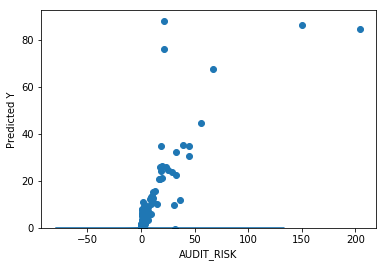

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lreg = LinearRegression().fit(X_train, y_train)

print(lreg)
print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))

# The coefficients
print('Coefficients: \n', lreg.coef_)
predictions = lreg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
sns.distplot((y_test-predictions), bins=500)
coeffecients = pd.DataFrame(lreg.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

## K-NN with train, test and validation datasets

In [37]:
# split data into train+validation set and test set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0


Size of training set: 427   size of validation set: 143   size of test set: 190



### Grid search on KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.59


In [39]:

model_score_array = []

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X, y)
model_score_array.append(knn_reg.score(X, y))
print(model_score_array)

[0.7978729088334284]


In [40]:
from sklearn import metrics
knn_tr_pred = knn_reg.predict(X_trainval)
knn_test_pred = knn_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_trainval, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('train mse: ', knn_tr_mse)
print('train rmse: ', knn_tr_rmse)

print('test mse: ', knn_test_mse)
print('test rmse: ', knn_test_rmse)

print('train score: ', knn_reg.score(X_trainval, y_trainval))
print('test score: ', knn_reg.score(X_test, y_test) )



train mse:  59.85155548251488
train rmse:  7.736378705991252
test mse:  54.800205399656704
test rmse:  7.402716082604864
train score:  0.7543353484109468
test score:  0.8715043166164965


## RIDGE with test, train and validation datasets

In [41]:
from sklearn.linear_model import Ridge
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
        ridge =Ridge()
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            

ridge = Ridge(**best_parameters)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.75
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.63


In [42]:
from  sklearn.linear_model import Ridge

model_score_list = []

 
ridge = Ridge(alpha=0.001)
ridge.fit(X,y)
model_score_list.append(ridge.score(X, y))

In [43]:

print(model_score_list)

[0.8570968902473612]


In [44]:
from sklearn import  metrics
ridge_tr_pred = ridge.predict(X_trainval)
ridge_test_pred =ridge.predict(X_test)
ridge_tr_mse = metrics.mean_squared_error(y_trainval,ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('train mse: ', ridge_tr_mse)
print('train rmse: ', ridge_tr_rmse)

print('test mse: ', ridge_test_mse)
print('test rmse: ', ridge_test_rmse)

train mse:  50.6706418500704
train rmse:  7.1183313950721905
test mse:  13.676106565420861
test rmse:  3.6981220322510806


## LASSO with train, test and validation datasets

In [45]:
from sklearn.linear_model import Lasso
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
        lasso =Lasso()
        # perform cross-validation
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
lasso = Lasso(**best_parameters)
lasso.fit(X_trainval, y_trainval)
test_score = lasso.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on validation set: 0.75
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.63


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [46]:
from sklearn.linear_model import Lasso

train_score_list = []
test_score_list = []


lasso = Lasso(alpha=0.001)
lasso.fit(X,y)

test_score_list.append(lasso.score(X, y))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [47]:

print(test_score_list)

[0.8436217730292718]


In [48]:
from sklearn import  metrics
lasso_tr_pred = lasso.predict(X_trainval)
lasso_test_pred =lasso.predict(X_test)
lasso_tr_mse = metrics.mean_squared_error(y_trainval,lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('train mse: ', lasso_tr_mse)
print('train rmse: ', lasso_tr_rmse)

print('test mse: ', lasso_test_mse)
print('test rmse: ', lasso_test_rmse)

train mse:  51.655460297733704
train rmse:  7.187173317635641
test mse:  26.34528361403806
test rmse:  5.132765688596944


## SGD REGRESSOR with train, test and validation datasets

In [49]:
from sklearn.linear_model import SGDRegressor
SGDR=SGDRegressor()
max_iter = [100000,10000,1000]
penalty_mod = ['l1','l2']

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(penalty=penalty_mod, max_iter= max_iter)
print(param_grid)

#instantiation of the grid
SGDR_grid = GridSearchCV(SGDR,param_grid)


# fitting the grid
SGDR_grid.fit(X,y)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


{'penalty': ['l1', 'l2'], 'max_iter': [100000, 10000, 1000]}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_mod

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'max_iter': [100000, 10000, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
SGDR_grid.best_score_

0.20856324980110164

In [51]:
SGDR_grid.best_params_

{'max_iter': 1000, 'penalty': 'l2'}

In [52]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 1000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_trainval, y_trainval)
print(sgd_reg.score(X_trainval, y_trainval))
print(sgd_reg.score(X_test, y_test))

-3692496966097.2866
-6180474627011.33


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [53]:
sgd_reg_tr_pred = sgd_reg.predict(X_train)
sgd_reg_test_pred = sgd_reg.predict(X_test)
print(sgd_reg_tr_pred )
print(sgd_reg_test_pred)

[ 1.04755325e+07 -1.50188051e+06 -5.22264087e+06  9.34518067e+06
  7.59799178e+07 -1.80754806e+05  7.74228184e+06  1.55942387e+07
  8.49900852e+05  5.21946063e+06  3.36018577e+06  7.47386579e+06
  9.39472105e+06  6.11807232e+06  9.75384329e+06  1.07866726e+08
  7.63769359e+06  2.75447228e+06 -2.63629597e+06  8.75483279e+05
  8.10295524e+06  6.47469203e+06  1.37971035e+07 -1.23802094e+06
  5.39880406e+06  9.88973783e+07  6.65581019e+06 -5.34506335e+06
  6.74500388e+05  9.13415222e+06  1.00337899e+07  1.19169501e+07
  9.57154639e+06  2.19017154e+07  7.88180194e+05  1.17647744e+07
  1.13719785e+07  1.07279431e+06  1.44216593e+07  8.71603614e+06
 -3.88506614e+06  1.09297407e+07  6.76789947e+06 -1.22493854e+08
 -1.69059345e+06 -7.04336191e+05  1.05705228e+07  9.30196002e+07
  1.06858517e+07  3.89521051e+06  9.98305101e+07  1.18955239e+06
  5.74145447e+06  7.68024627e+06  1.02453972e+08  1.22957638e+06
  1.05698467e+07 -7.78263878e+05  8.98824711e+06  1.01344183e+07
 -1.56551525e+07  4.41567

## POLYMONIAL REGRESSION with train, test and validation datasets

In [54]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_trainval)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_trainval)
    train_score_list.append(lreg.score(X_train_poly, y_trainval))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [55]:
print(train_score_list)
print(test_score_list)

[0.8030326957855614, 1.0]
[0.631448959209817, 0.9989088808065739]


## DECISION TREE REGRESSION with test, train and validation datasets

In [56]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import os
import pandas as pd
import mglearn


DT_r = DecisionTreeRegressor()
DT_r.fit(X_trainval,y_trainval)

DT_tr_pred = DT_r.predict(X_trainval)
DT_test_pred = DT_r.predict(X_test)
linear_reg = LinearRegression().fit(X_trainval, y_trainval)



pred_lr = linear_reg.predict(X_trainval)
pred_test =linear_reg.predict(X_test)



In [57]:

pred_lr 
pred_test


array([ 1.25576222e-01,  1.56941258e+00,  4.56357760e+00, -1.78529416e+00,
        3.48082031e+01,  1.66855292e+00, -1.06626302e+00,  3.42759476e+00,
        2.42584867e+01, -9.36380540e-01,  4.54751612e+00,  1.33702238e+01,
       -1.64930054e-01, -1.11685836e+00,  1.48224460e+00, -7.39329875e-01,
       -8.78003816e-01, -1.07029023e+00,  1.05956958e-01, -1.48188507e+00,
        7.42646521e-01, -4.93897181e-01,  8.46659545e+01, -1.06157976e+00,
       -2.69600076e+00,  8.44368137e-01, -3.48126396e-01,  7.39934520e+00,
       -1.46369608e-01,  7.99373443e+00,  8.80421661e+01,  1.12141233e+01,
        9.92928487e+00,  1.18423687e+00, -1.20249379e+00,  2.07481418e+01,
        1.25905965e+00,  6.29189512e+00, -1.80157970e+00,  4.49919172e-02,
        8.79344228e+00,  2.80124666e-01,  2.97341324e+00,  5.04745849e-01,
        2.53918505e+00,  5.50008428e-01, -7.69412431e-01, -3.10772009e+00,
        1.26590864e+01,  7.40373730e+00, -5.68827361e-01,  4.49335405e-01,
        6.00120787e+00,  

In [58]:
from sklearn import  metrics
pred_lr = linear_reg.predict(X_trainval)
pred_test =linear_reg.predict(X_test)
pred_lr_mse = metrics.mean_squared_error(y_trainval,pred_lr)
pred_lr_rmse = np.sqrt(pred_lr_mse)
pred_test_mse = metrics.mean_squared_error(y_test, pred_test)
pred_test_rmse = np.sqrt(pred_test_mse)

print('train mse: ', pred_lr_mse)
print('train rmse: ', pred_lr_rmse)

print('test mse: ', pred_test_mse)
print('test rmse: ', pred_test_rmse)

train mse:  47.9873659485701
train rmse:  6.927291386145821
test mse:  157.17783044338606
test rmse:  12.537058285075732


## SVM/ SVR with GridSearch using train, test and validation datasets

In [59]:
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=5, return_train_score=True)
    
#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Best parameters: {'C': 100}
Best cross-validation score: 0.80


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

### SVM/SVR Linear kernel

In [60]:
# SVM Linear
from sklearn import svm
svm_r = svm.SVR(kernel='linear', C = 100)
svm_r.fit(X_train, y_train)

svmr_tr_pred = svm_r.predict(X_train)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)

train mse:  37.257580465537714
train rmse:  6.103898792209592
test mse:  192.94807776621076
test rmse:  13.890575141663888


### SVM/SVR RBF kernel

In [61]:
# SVM RBF

svm_r = svm.SVR(kernel='rbf', C = 100)
svm_r.fit(X_train, y_train)

svmr_tr_pred = svm_r.predict(X_train)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)

train mse:  31.162318574356746
train rmse:  5.582321969786117
test mse:  195.1753975901816
test rmse:  13.970518873334004


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### SVM/SVR Poly kernel

In [62]:
## SVM Regressor - poly Kernel vs Linear

svm_r = svm.SVR(kernel='poly', C = 100, degree=3)
svm_r.fit(X_train, y_train)

svmr_tr_pred = svm_r.predict(X_train)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)

train mse:  96.37537337357507
train rmse:  9.817095974552508
test mse:  339.54133951702727
test rmse:  18.426647538742017


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
